<div class = "row">
    <div class = "colums">
        <img src="..\trecslogo.png" align="left" alt="Drawing" width ="60"/>    
    </div>
    <div class = "colums">
        <img src="..\asrlogo.png" align="right" alt="Drawing" width ="175"/>
    </div>    
</div>

# BOND

## Algemeen

### Import en instellingen

In [511]:
import pandas as pd
import numpy as np
import datetime
import math
from scipy.optimize import fsolve
from scipy.stats import norm
from matplotlib import pyplot as plt

Links uitlijnen tabellen

In [512]:
%%html
<style>
    table {
        display: inline-block
    }
</style>

Bij printen van een dataframe wordt slechts een beperkt aantal rijen getoond.

In [513]:
pd.set_option('display.max_rows', 10)

## Initialisatie parameters

In [514]:
# data
datePricingPrimo = '20220331' # in dit notebook veronderstel ik dat de actuele datum dezelfde is als de kwartaal datum
datePricingUltimo = '20220430'

datePricingPrimo = datetime.datetime.strptime(datePricingPrimo, '%Y%m%d')
datePricingUltimo = datetime.datetime.strptime(datePricingUltimo, '%Y%m%d')

# naam van de basis curve
curveNameBasis = 'FairValue'


## Importeer en bewerk data

### Rentecurves
In de TRT is een begin gemaakt om te rekenen met de dual curve methodiek, dus op basis van de zero swap curve en de zero EONIA curve. Dit moet in TRT nog verder worden uitgewerkt en is nog niet operationeel. Dit notebook is daarom vooralsnog obv single curve methodiek (net zoals TRT).

#### Rentecurves primo

In [515]:
df_scenariosPrimo = pd.read_excel(r"scenariobestanden/scenariosAssetsM03.xlsx", decimal = '.')
df_curvesPrimo = df_scenariosPrimo.loc[df_scenariosPrimo['Item'] != 'schokVolatiliteit']
df_curvesPrimo = df_curvesPrimo.reset_index(drop=True)
pd.options.display.float_format = '{:,.8f}'.format
df_curvesPrimo

,Item,Currency,FairValue,swap.cra.zero.va.down,swap.cra.zero.va.up,SII_basis,SII_Yield_Curve_down,SII_Yield_Curve_up,SII_basis.EQUITY_TYPE_1,SII_basis.EQUITY_TYPE_2,...,swap.cra.eur-stylized-1.zero.va.sw345.down345,swap.cra.eur-stylized-1.zero.va.sw345.up345,swap.cra.dnb,swap.cra.dnb.up,swap.cra.dnb.down,swap.cra.zero.va-ratio50.sw270,swap.cra.zero.va-ratio50.sw270.down270,swap.cra.zero.va-ratio50.sw270.up270,swap.cra.zero.va-ratio50.sw270_Currency_Up,swap.cra.zero.va-ratio50.sw270_Currency_Down
0,1,AUD,0.01340126,0.00411185,0.02340126,0.01340126,0.00413126,0.02340126,0.01340126,0.01340126,...,0.00413126,0.02340126,0.01340126,0.02340126,0.00411185,0.01340126,0.00413138,0.02340126,0.01340126,0.01340126
1,2,AUD,0.02318386,0.00866075,0.03882413,0.02318386,0.00872807,0.03875163,0.02318386,0.02318386,...,0.00872807,0.03875163,0.02318386,0.03882413,0.00866075,0.02318386,0.00872812,0.03875159,0.02318386,0.02318386
2,3,AUD,0.02726764,0.01250746,0.04413641,0.02726764,0.01259564,0.04403563,0.02726764,0.02726764,...,0.01259564,0.04403563,0.02726764,0.04413641,0.01250746,0.02726764,0.01259569,0.04403558,0.02726764,0.02726764
3,4,AUD,0.02986319,0.01583608,0.04641518,0.02986319,0.01592789,0.04630684,0.02986319,0.02986319,...,0.01592789,0.04630684,0.02986319,0.04641518,0.01583608,0.02986319,0.01592792,0.04630680,0.02986319,0.02986319
4,5,AUD,0.02973276,0.01642983,0.04563843,0.02973276,0.01652080,0.04552966,0.02973276,0.02973276,...,0.01652080,0.04552966,0.02973276,0.04563843,0.01642983,0.02973276,0.01652082,0.04552964,0.02973276,0.02973276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,96,ZAR,0.08923194,0.07368307,0.10478081,0.08923194,0.07664417,0.10181970,0.08923194,0.08923194,...,0.07667099,0.10182926,0.08923194,0.10478081,0.07368307,0.08923194,0.07781110,0.10065278,0.08923194,0.08923194
396,97,ZAR,0.08923194,0.07368307,0.10478081,0.08923194,0.07666060,0.10180327,0.08923194,0.08923194,...,0.07668733,0.10181292,0.08923194,0.10478081,0.07368307,0.08923194,0.07783099,0.10063288,0.08923194,0.08923194
397,98,ZAR,0.08923194,0.07368307,0.10478081,0.08923194,0.07667669,0.10178718,0.08923194,0.08923194,...,0.07670333,0.10179692,0.08923194,0.10478081,0.07368307,0.08923194,0.07785047,0.10061340,0.08923194,0.08923194
398,99,ZAR,0.08923194,0.07368307,0.10478081,0.08923194,0.07669246,0.10177142,0.08923194,0.08923194,...,0.07671901,0.10178124,0.08923194,0.10478081,0.07368307,0.08923194,0.07786956,0.10059431,0.08923194,0.08923194


In [516]:
scenarioNamesPrimo = list(df_curvesPrimo.columns)[2:]
#scenarioNamesPrimo = ['FairValue', 'swap.cra.zero.va.down']
scenarioNamesPrimo

['FairValue',
 'swap.cra.zero.va.down',
 'swap.cra.zero.va.up',
 'SII_basis',
 'SII_Yield_Curve_down',
 'SII_Yield_Curve_up',
 'SII_basis.EQUITY_TYPE_1',
 'SII_basis.EQUITY_TYPE_2',
 'SII_basis.EQUITY_QUINF',
 'SII_basis.EQUITY_QUINFC',
 'SII_basis.EQUITY_Average',
 'SCR_Average_zonder_OMA',
 'SCR_Average_OMA_Q2',
 'SCR_Average_OMA_Q4',
 'SII_Real_Estate',
 'SCR_Currency_Up',
 'SCR_Currency_Down',
 'ECAP_basis',
 'ECAP_Yield_Curve_down',
 'ECAP_Yield_Curve_up',
 'ECAP_basis.EQUITY_VM_EURO',
 'ECAP_basis.EQUITY_Deelnemingen',
 'ECAP_basis.EQUITY_Alternatives',
 'ECAP_basis.EQUITY_Emerging_Markets',
 'ECAP_basis.EQUITY_VM_NON_EURO',
 'ECAP_Real_Estate',
 'ECAP_Currency_Up',
 'ECAP_Currency_Down',
 'SII_Real_Estate_-10procent',
 'Vastgoed_-10procent',
 'Aandelen_-20procent.EQUITY_TYPE_1',
 'Aandelen_-20procent.EQUITY_TYPE_2',
 'Aandelen_-20procent.EQUITY_QUINF',
 'Aandelen_-20procent.EQUITY_QUINFC',
 'Aandelen_-20procent.EQUITY_Average',
 'Aandelen_-20procent',
 'swap.cra.zero.va.plus20bp

#### Rentecurves ultimo

In [517]:
df_scenariosUltimo = pd.read_excel(r"scenariobestanden/scenariosAssetsM04.xlsx", decimal = '.')
df_curvesUltimo = df_scenariosUltimo.loc[df_scenariosPrimo['Item'] != 'schokVolatiliteit']
df_curvesUltimo = df_curvesUltimo.reset_index(drop=True)
#pd.options.display.float_format = '{:,.8f}'.format
df_curvesUltimo

,Item,Currency,FairValue,swap.cra.zero.va.down,swap.cra.zero.va.up,SII_basis,SII_Yield_Curve_down,SII_Yield_Curve_up,SII_basis.EQUITY_TYPE_1,SII_basis.EQUITY_TYPE_2,...,swap.cra.eur-pc-1.zero.va.sw345.up345,swap.cra.eur-pc-2.zero.va.sw345.down345,swap.cra.eur-pc-2.zero.va.sw345.up345,swap.cra.eur-pc-3.zero.va.sw345.down345,swap.cra.eur-pc-3.zero.va.sw345.up345,swap.cra.eur-stylized-1.zero.va.sw345.down345,swap.cra.eur-stylized-1.zero.va.sw345.up345,swap.cra.dnb,swap.cra.dnb.up,swap.cra.dnb.down
0,1,AUD,0.02302793,0.00681310,0.03816177,0.02302793,0.00688758,0.03809226,0.02302793,0.02302793,...,0.04614572,0.00526860,0.02744682,0.00650766,0.03560709,0.00688758,0.03809226,0.02302793,0.03816177,0.00681310
1,2,AUD,0.03060903,0.01174937,0.05091944,0.03060903,0.01187282,0.05078649,0.03060903,0.03060903,...,0.05891661,0.01000472,0.04200112,0.01155927,0.04931941,0.01187282,0.05078649,0.03060903,0.05091944,0.01174937
2,3,AUD,0.03303983,0.01558868,0.05298400,0.03303983,0.01571682,0.05283756,0.03303983,0.03303983,...,0.06070583,0.01382275,0.04596383,0.01560195,0.05242209,0.01571682,0.05283756,0.03303983,0.05298400,0.01558868
3,4,AUD,0.03406833,0.01796711,0.05306776,0.03406833,0.01809068,0.05292195,0.03406833,0.03406833,...,0.06056207,0.01638204,0.04760794,0.01817132,0.05317053,0.01809068,0.05292195,0.03406833,0.05306776,0.01796711
4,5,AUD,0.03457678,0.01948829,0.05261736,0.03457678,0.01960739,0.05247496,0.03457678,0.03457678,...,0.05992892,0.01815790,0.04839215,0.01985556,0.05316918,0.01960739,0.05247496,0.03457678,0.05261736,0.01948829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,96,ZAR,0.09448272,0.08089754,0.10806790,0.09448272,0.08158805,0.10737740,0.09448272,0.09448272,...,0.11288026,0.08451981,0.11051763,0.07976524,0.10562119,0.08161916,0.10739009,0.09448272,0.10806790,0.08089754
396,97,ZAR,0.09448272,0.08089754,0.10806790,0.09448272,0.08160767,0.10735778,0.09448272,0.09448272,...,0.11285815,0.08454051,0.11049692,0.07978521,0.10560122,0.08163868,0.10737057,0.09448272,0.10806790,0.08089754
397,98,ZAR,0.09448272,0.08089754,0.10806790,0.09448272,0.08162688,0.10733857,0.09448272,0.09448272,...,0.11283649,0.08456079,0.11047664,0.07980476,0.10558167,0.08165780,0.10735145,0.09448272,0.10806790,0.08089754
398,99,ZAR,0.09448272,0.08089754,0.10806790,0.09448272,0.08164571,0.10731974,0.09448272,0.09448272,...,0.11281528,0.08458065,0.11045678,0.07982392,0.10556251,0.08167654,0.10733271,0.09448272,0.10806790,0.08089754


In [518]:
scenarioNamesUltimo = list(df_curvesUltimo.columns)[2:]
#scenarioNamesUltimo = ['FairValue', 'swap.cra.zero.va.down']
scenarioNamesUltimo

['FairValue',
 'swap.cra.zero.va.down',
 'swap.cra.zero.va.up',
 'SII_basis',
 'SII_Yield_Curve_down',
 'SII_Yield_Curve_up',
 'SII_basis.EQUITY_TYPE_1',
 'SII_basis.EQUITY_TYPE_2',
 'SII_basis.EQUITY_QUINF',
 'SII_basis.EQUITY_QUINFC',
 'SII_basis.EQUITY_Average',
 'SCR_Average_zonder_OMA',
 'SCR_Average_OMA_Q2',
 'SCR_Average_OMA_Q4',
 'SII_Real_Estate',
 'SCR_Currency_Up',
 'SCR_Currency_Down',
 'ECAP_basis',
 'ECAP_Yield_Curve_down',
 'ECAP_Yield_Curve_up',
 'ECAP_basis.EQUITY_VM_EURO',
 'ECAP_basis.EQUITY_Deelnemingen',
 'ECAP_basis.EQUITY_Alternatives',
 'ECAP_basis.EQUITY_Emerging_Markets',
 'ECAP_basis.EQUITY_VM_NON_EURO',
 'ECAP_Real_Estate',
 'ECAP_Currency_Up',
 'ECAP_Currency_Down',
 'SII_Real_Estate_-10procent',
 'Vastgoed_-10procent',
 'Aandelen_-20procent.EQUITY_TYPE_1',
 'Aandelen_-20procent.EQUITY_TYPE_2',
 'Aandelen_-20procent.EQUITY_QUINF',
 'Aandelen_-20procent.EQUITY_QUINFC',
 'Aandelen_-20procent.EQUITY_Average',
 'Aandelen_-20procent',
 'swap.cra.zero.va.plus20bp

### IMW bestand

#### IMW bestand primo

In [519]:
col_list = [
    'Reporting Date', \
    'Cic Id Ll', \
    'Ecs Cons Ecap asr', \
    'Portfolio Id', \
    'Security ID', \
    'Security Id Ll', \
    'Security Type Ll', \
    'Eliminatie ASR', \
    'Maturity LL', \
    'SelectieIndex LL', \
    'Coupon Perc Laagste Lt Level', \
    'Coupon Type Laagste Lt Level', \
    'Coupon Frequency Laagste Level', \
    'Coupon Reference Rate Ll', \
    'Coupon Spread Ll', \
    'Currency Laagste LT Level', \
    'FX Rate QC PC Laagste LT Level', \
    'Leg no', \
    'Market Value EUR LL', \
    'Balnomval qc', \
    'Convertible Optie Waarde Ll', \
    'Accrued Interest Ll']
df_bondsIMWPrimo = pd.read_csv(r"imwbestand/2022M03 Adjusted IMW Weekupdate 202205131221.csv", usecols = col_list, sep = ";", decimal = '.', encoding= 'unicode_escape', low_memory=False)

In [520]:
df_bondsIMWPrimo.rename(columns = { \
                              'Cic Id Ll':'cicCode', \
                              'Ecs Cons Ecap asr': 'company', \
                              'Portfolio Id': 'portfolio', \
                              'Security ID': 'securityId', \
                              'Security Id Ll': 'securityIdLL', \
                              'Security Type Ll': 'securityTypeLL', \
                              'Eliminatie ASR': 'eliminatieASR', \
                              'SelectieIndex LL': 'reportCode', \
                              'Coupon Perc Laagste Lt Level': 'couponPercentage', \
                              'Coupon Type Laagste Lt Level': 'couponType', \
                              'Coupon Frequency Laagste Level': 'couponFrequency', \
                              'Coupon Reference Rate Ll': 'couponReferenceRate', \
                              'Coupon Spread Ll': 'couponSpread', \
                              'Currency Laagste LT Level': 'currencyName', \
                              'FX Rate QC PC Laagste LT Level': 'currencyRateEUR_FX', \
                              'Leg no': 'leg', \
                              'Market Value EUR LL':'marketValueIMW', \
                              'Balnomval qc':'nominalValue', \
                              'Convertible Optie Waarde Ll': 'convertibleOptionValue', \
                              'Accrued Interest Ll': 'accruedInterest' \
                             }, inplace = True)
#pd.options.display.float_format = '{:,.2f}'.format

In [521]:
df_bondsIMWPrimo = df_bondsIMWPrimo.loc[\
                                       (df_bondsIMWPrimo['securityTypeLL'] == 'BOND') |\
                                       (df_bondsIMWPrimo['securityTypeLL'] == 'BOND ZERO')|\
                                       (df_bondsIMWPrimo['securityTypeLL'] == 'BOND FRN')|\
                                       (df_bondsIMWPrimo['securityTypeLL'] == 'INDEX BOND')|\
                                       (df_bondsIMWPrimo['securityTypeLL'] == 'LOAN')|\
                                       (df_bondsIMWPrimo['securityTypeLL'] == 'LOAN ZERO')|\
                                       (df_bondsIMWPrimo['securityTypeLL'] == 'LOAN CLIMB')|\
                                       (df_bondsIMWPrimo['securityTypeLL'] == 'PERPETUAL')|\
                                       (df_bondsIMWPrimo['securityTypeLL'] == 'ABS')|\
                                       (df_bondsIMWPrimo['securityTypeLL'] == 'DEPOSIT}')|\
                                       (df_bondsIMWPrimo['securityTypeLL'] == 'PREF')|\
                                       (df_bondsIMWPrimo['securityTypeLL'] == 'LOAN SUB')]
df_bondsIMWPrimo = df_bondsIMWPrimo.reset_index(drop=True)

In [522]:
df_bondsIMWPrimo['dateIMW'] = pd.to_datetime(df_bondsIMWPrimo['Reporting Date'], format='%Y%m%d')
df_bondsIMWPrimo['dateMaturity'] = pd.to_datetime(df_bondsIMWPrimo['Maturity LL'], format='%Y%m%d', errors='coerce')
df_bondsIMWPrimo = df_bondsIMWPrimo.drop(['Reporting Date', 'Maturity LL'], axis = 1)

In [523]:
df_bondsIMWPrimo['reportCode'] = df_bondsIMWPrimo['reportCode'].astype(str)
df_bondsIMWPrimo['securityIdLL'] = df_bondsIMWPrimo['securityIdLL'].astype(str)
df_bondsIMWPrimo['leg'] = df_bondsIMWPrimo['leg'].astype(str)

In [524]:
# het tweede element in de reportCode string geeft aan of sprake is van looktrough (1) of niet (0)
df_bondsIMWPrimo['key'] = np.where(df_bondsIMWPrimo['reportCode'].str[1:2] == '1', \
                                   'LT_' +  df_bondsIMWPrimo['portfolio'] + '_' +  df_bondsIMWPrimo['securityId'] + '_' +  df_bondsIMWPrimo['securityIdLL'] + '_' +  df_bondsIMWPrimo['leg'], \
                                   df_bondsIMWPrimo['portfolio'] + '_' + df_bondsIMWPrimo['securityId'] + '_' + df_bondsIMWPrimo['leg'])
df_bondsIMWPrimo

,company,eliminatieASR,portfolio,securityId,leg,nominalValue,reportCode,cicCode,securityTypeLL,securityIdLL,...,couponPercentage,couponType,couponFrequency,couponReferenceRate,couponSpread,currencyName,currencyRateEUR_FX,dateIMW,dateMaturity,key
0,2523_ECAP,0,FGHRB170,LU0131211178,0,"18,001.08800000",1100010000000000.0,DE21,BOND,DE000BHY0GN0,...,0.37500000,Fixed,1,0.00000000,0.00000000,EUR,1.00000000,2022-03-31,2027-01-25,LT_FGHRB170_LU0131211178_DE000BHY0GN0_0
1,2523_ECAP,0,FONV170,LU0131211178,0,"12,601.57000000",1100010000000000.0,DE21,BOND,DE000BHY0GN0,...,0.37500000,Fixed,1,0.00000000,0.00000000,EUR,1.00000000,2022-03-31,2027-01-25,LT_FONV170_LU0131211178_DE000BHY0GN0_0
2,2523_ECAP,0,FMCB170,LU0131211178,0,"26,217.77100000",1100010000000000.0,DE21,BOND,DE000BHY0GN0,...,0.37500000,Fixed,1,0.00000000,0.00000000,EUR,1.00000000,2022-03-31,2027-01-25,LT_FMCB170_LU0131211178_DE000BHY0GN0_0
3,2523_ECAP,0,BEL170,PAEIPEBF (A),0,"249,003.98410000",1100010000000000.0,IE21,BOND,XS1890836296,...,1.50000000,Fixed,1,0.00000000,0.00000000,EUR,1.00000000,2022-03-31,2028-12-15,LT_BEL170_PAEIPEBF (A)_XS1890836296_0
4,2523_ECAP,0,FMCB170,LU0131211178,0,"26,217.77100000",1100010000000000.0,IE21,BOND,XS2404629235,...,0.12500000,Fixed,1,0.00000000,0.00000000,EUR,1.00000000,2022-03-31,2026-11-03,LT_FMCB170_LU0131211178_XS2404629235_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9367,2523_ECAP,0,FONV170,LU0131211178,0,"12,601.57000000",1100010000000000.0,IE21,BOND,XS2366415201,...,1.62500000,Fixed,1,0.00000000,0.00000000,EUR,1.00000000,2022-03-31,2041-10-18,LT_FONV170_LU0131211178_XS2366415201_0
9368,2523_ECAP,0,BEL170,AVDEF,0,"24,937.65586000",100011000000000.0,XT84,LOAN,ASRLMG,...,1.84292700,Adjust,12,0.00000000,0.00000000,EUR,1.00000000,2022-03-31,2099-12-01,BEL170_AVDEF_0
9369,2523_ECAP,0,ILL170,APDF,0,"454,552.09330000",1100010000000000.0,XT81,LOAN,124428,...,4.75000000,Floating,4,0.00000000,4.75000000,EUR,1.00000000,2022-03-31,2027-02-12,LT_ILL170_APDF_124428_0
9370,2523_ECAP,0,BEL170,AVDEF,0,"24,937.65586000",1100010000000000.0,IE21,BOND,XS1253558388,...,2.00000000,Fixed,1,0.00000000,0.00000000,EUR,1.00000000,2022-03-31,2023-06-30,LT_BEL170_AVDEF_XS1253558388_0


#### IMW bestand ultimo

### Kasstroom bestand

#### Kasstroom bestand primo

In [525]:
col_list = [
    'Portfolio', \
    'Leg', \
    'ID', \
    'Time', \
    'Cash Flow (rente typisch)']
df_cashflowsPrimo = pd.read_csv(r"kasstroombestand/2022M03 Kasstromen_v1.0.csv", usecols = col_list, sep = ";", decimal = '.', encoding= 'unicode_escape', low_memory=False)

In [526]:
df_cashflowsPrimo.rename(columns = { \
                              'Portfolio':'portfolio', \
                              'Leg': 'leg', \
                              'ID': 'securityId', \
                              'Cash Flow (rente typisch)': 'cashflowRente', \
                             }, inplace = True)

In [527]:
df_cashflowsPrimo['dateCashflow'] = pd.to_datetime(df_cashflowsPrimo['Time'], format='%d-%m-%Y', errors='coerce')

In [528]:
df_cashflowsPrimo['leg'] = df_cashflowsPrimo['leg'].astype(str)
df_cashflowsPrimo['securityId'] = df_cashflowsPrimo['securityId'].astype(str)

In [529]:
df_cashflowsPrimo = df_cashflowsPrimo[df_cashflowsPrimo['dateCashflow'].notna()]

In [530]:
df_cashflowsPrimo['key'] = df_cashflowsPrimo['portfolio'] + '_' + df_cashflowsPrimo['securityId'] + '_' + df_cashflowsPrimo['leg']

In [531]:
df_cashflowsPrimo = df_cashflowsPrimo.drop(['Time', 'portfolio', 'leg', 'securityId'], axis = 1)

In [532]:
df_cashflowsPrimo = df_cashflowsPrimo.groupby('key').agg(lambda x: list(x))

In [533]:
df_cashflowsPrimo

,cashflowRente,dateCashflow
key,,
AZEAMP_DE000A1RE1Q3_0,[528125],[2022-10-17 00:00:00]
AZEAMP_FR0000471930_0,"[28437.5, 28437.5, 28437.5, 28437.5, 28437.5, ...","[2023-01-30 00:00:00, 2024-01-29 00:00:00, 202..."
AZEAMP_FR0011949403_0,"[21250, 21250, 21250, 521250]","[2022-06-06 00:00:00, 2023-06-05 00:00:00, 202..."
AZEAMP_FR0012432912_0,"[7875, 7875, 705895.49]","[2023-01-16 00:00:00, 2024-01-15 00:00:00, 202..."
AZEAMP_FR0012599892_0,"[9625, 9625, 707251.71]","[2023-03-10 00:00:00, 2024-03-11 00:00:00, 202..."
...,...,...
TRS175_DE0001102309_0,[12078500],[2023-02-15 00:00:00]
TRS175_ES0L02301130_0,[8800000],[2023-01-13 00:00:00]
TRS175_EU000A3JZQW4_0,[4550000],[2022-11-10 00:00:00]


In [534]:
#df_cashflowsPrimo.to_excel('output.xlsx')

#### Kasstroom bestand ultimo

### Merge IMW bestand en kasstroom bestand

#### Merge IMW bestand en kasstroom bestand primo

In [535]:
df_bondsIMWPrimo = pd.merge(df_bondsIMWPrimo, df_cashflowsPrimo, how = 'left', on = 'key')
df_bondsIMWPrimo

,company,eliminatieASR,portfolio,securityId,leg,nominalValue,reportCode,cicCode,securityTypeLL,securityIdLL,...,couponFrequency,couponReferenceRate,couponSpread,currencyName,currencyRateEUR_FX,dateIMW,dateMaturity,key,cashflowRente,dateCashflow
0,2523_ECAP,0,FGHRB170,LU0131211178,0,"18,001.08800000",1100010000000000.0,DE21,BOND,DE000BHY0GN0,...,1,0.00000000,0.00000000,EUR,1.00000000,2022-03-31,2027-01-25,LT_FGHRB170_LU0131211178_DE000BHY0GN0_0,NaN,NaN
1,2523_ECAP,0,FONV170,LU0131211178,0,"12,601.57000000",1100010000000000.0,DE21,BOND,DE000BHY0GN0,...,1,0.00000000,0.00000000,EUR,1.00000000,2022-03-31,2027-01-25,LT_FONV170_LU0131211178_DE000BHY0GN0_0,NaN,NaN
2,2523_ECAP,0,FMCB170,LU0131211178,0,"26,217.77100000",1100010000000000.0,DE21,BOND,DE000BHY0GN0,...,1,0.00000000,0.00000000,EUR,1.00000000,2022-03-31,2027-01-25,LT_FMCB170_LU0131211178_DE000BHY0GN0_0,NaN,NaN
3,2523_ECAP,0,BEL170,PAEIPEBF (A),0,"249,003.98410000",1100010000000000.0,IE21,BOND,XS1890836296,...,1,0.00000000,0.00000000,EUR,1.00000000,2022-03-31,2028-12-15,LT_BEL170_PAEIPEBF (A)_XS1890836296_0,NaN,NaN
4,2523_ECAP,0,FMCB170,LU0131211178,0,"26,217.77100000",1100010000000000.0,IE21,BOND,XS2404629235,...,1,0.00000000,0.00000000,EUR,1.00000000,2022-03-31,2026-11-03,LT_FMCB170_LU0131211178_XS2404629235_0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9367,2523_ECAP,0,FONV170,LU0131211178,0,"12,601.57000000",1100010000000000.0,IE21,BOND,XS2366415201,...,1,0.00000000,0.00000000,EUR,1.00000000,2022-03-31,2041-10-18,LT_FONV170_LU0131211178_XS2366415201_0,NaN,NaN
9368,2523_ECAP,0,BEL170,AVDEF,0,"24,937.65586000",100011000000000.0,XT84,LOAN,ASRLMG,...,12,0.00000000,0.00000000,EUR,1.00000000,2022-03-31,2099-12-01,BEL170_AVDEF_0,NaN,NaN
9369,2523_ECAP,0,ILL170,APDF,0,"454,552.09330000",1100010000000000.0,XT81,LOAN,124428,...,4,0.00000000,4.75000000,EUR,1.00000000,2022-03-31,2027-02-12,LT_ILL170_APDF_124428_0,NaN,NaN
9370,2523_ECAP,0,BEL170,AVDEF,0,"24,937.65586000",1100010000000000.0,IE21,BOND,XS1253558388,...,1,0.00000000,0.00000000,EUR,1.00000000,2022-03-31,2023-06-30,LT_BEL170_AVDEF_XS1253558388_0,NaN,NaN


In [536]:
#df_bondsIMWPrimo.to_excel('output.xlsx')

#### Merge IMW bestand en kasstroom bestand ultimo

## Documentatie

## Functie voor pricing swaptions

In [35]:
# def getPriceModel(curve, swaptionType, cashSettled, tenor, expiry, volatility, strike):
     
#     # make discounts from interest rate curve
#     discounts = [1]
#     for t in range(1, 100):
#         discounts.append(1*(1+curve[t-1])**(-t))
    
#     # make maturities for swap fixed cashflows (assumption is 6 months payment)
#     maturitiesSwap = [] 
#     for t in range(0, round(tenor)*m+1):
#         maturitiesSwap.append(expiry+t*1/m)
    
#     # make discounts related to swap fixed cashflows via linear interpolation
#     maturities = range(0, 100)
#     discountsSwap = np.interp(maturitiesSwap, maturities, discounts)
# #     print('discountsSwap', discountsSwap[0])
    
#     # calculate the forward rate with maturity equal to tenor and starting at expiry date
#     forwardRate = (discountsSwap[0]/discountsSwap[-1])**(1/max(1,round(tenor)))-1
# #     print('forwardRate', forwardRate)
    
#     if Bachelier:
#         if volatility == 0:
#             volatility = 1
#         if expiry == 0:
#             expiry = 1
#         d = (forwardRate-strike)/(volatility*math.sqrt(expiry))
#         z = 1
#         if swaptionType == 'receiver':
#             z = -1
#         price = volatility*math.sqrt(expiry)*norm.pdf(d)+z*(forwardRate-strike)*norm.cdf(z*d)
#         if cashSettled:
#             if forwardRate == 0:
#                 forwardRate = 1
#             factor = discountsSwap[0]*((1-1/(1+forwardRate/m)**(m*round(tenor)))/forwardRate)
#             priceModel = price*factor
#         else:
#             sumDiscount = 0
#             for t in range(1, len(discountsSwap)):
#                 sumDiscount += discountsSwap[t]/m
#             priceModel = price*sumDiscount
#     else: # Hull & White
#         raise ValueError('Hull & White model is not yet implemented!')

#     return priceModel

In [36]:
# def calibrateImpliedVolatilityModel(impliedVolatilityModel, *data):
#     priceIMW = data[0]
#     priceModel = getPriceModel(data[6], data[1], data[2], data[3], data[4], impliedVolatilityModel, data[5])
# #     print(priceModel, priceIMW, impliedVolatilityModel)
#     return priceModel-priceIMW

## Classes voor bonds

In [537]:
class Instrument:
    def __init__(self, dateIMW, company, portfolio, cicCode, securityId, securityIdLL):
        self.dateIMW = dateIMW
        self.company = company
        self.portfolio = portfolio
        self.cicCode = cicCode
        self.securityId = securityId
        self.securityIdLL = securityIdLL

### Class voor waardering bond

In [538]:
class Bond(Instrument):

    # Initialiseren van class argumenten obv meegegeven data
    # Bij het aanmaken van een nieuw object worden deze meteen geïnitialiseerd

    def __init__(self, dateIMW, company, portfolio, cicCode, securityId, securityIdLL, securityTypeLL, eliminatieASR, dateMaturity, reportCode, couponPercentage, couponType, couponFrequency, couponReferenceRate, couponSpread, currencyName, currencyRateEUR_FX, leg, marketValueIMW, nominalValue, convertibleOptionValue, accruedInterest, cashflowRente, dateCashflow):
        super().__init__(dateIMW, company, portfolio, cicCode, securityId, securityIdLL)
        self.securityTypeLL = securityTypeLL
        self.eliminatieASR = eliminatieASR
        self.dateMaturity = dateMaturity
        self.reportCode = reportCode
        self.couponPerunage = couponPercentage / 100
        self.couponType = couponType
        self.couponFrequency = couponFrequency
        self.couponReferenceRate = couponReferenceRate / 100
        self.couponSpread = couponSpread / 100
        self.currencyName = currencyName
        self.currencyRateEUR_FX = currencyRateEUR_FX
        self.leg = leg
        self.marketValueIMW = marketValueIMW
        self.nominalValue = nominalValue
        self.convertibleOptionValue = convertibleOptionValue
        self.accruedInterest = accruedInterest
        self.cashflowRente = cashflowRente
        self.dateCashflow = dateCashflow
        
        self.getBondType() # cashflow (alleen te verdisconteren, inflation niet alleen te verdisconteren)
        self.getLookThrough() 
        self.getPriceIMW()
        self.getCurrencyFX_EUR()
        self.getNominalValue()
        

    # Berekenen van class argumenten alleen obv geïnitialiseerde class argumenten
    # Bij het aanmaken van een nieuw object worden deze automatisch aangemaakt.
    
    def getBondType(self):
        if self.securityTypeLL == 'INDEX BOND':
            self.bondType = 'inflation'
        else:
            self.bondType = 'cashflow'

    def getLookThrough(self):
        self.lookThrough = False
        if str(self.reportCode)[1:2] == '1':
            self.lookThrough = True
            
    def getPriceIMW(self):
        if self.nominalValue == 0:
            self.priceIMW = 0
        else:
            self.priceIMW = self.marketValueIMW / self.nominalValue           
            
    def getCurrencyFX_EUR(self):
        if self.currencyRateEUR_FX <= 0:
            self.currencyRateEUR_FX = 1
        self.currencyRateFX_EUR = 1 / self.currencyRateEUR_FX
        
    def getNominalValue(self):
        if self.lookThrough:
            self.nominalValue = self.marketValueIMW / self.currencyRateFX_EUR

    # Berekenen van class argumenten obv geïnitialiseerde en berekende class argumenten, en obv extra input die niet tot de class behoort
    # Bij het aanmaken van een nieuw object worden deze niet automatisch aangemaakt. 
    # De argumenten worden pas aangemaakt zodra de betreffende functie in de code wordt aangeroepen.
    
#     def getMarketValueModel(self, curve):
#         self.marketValueModel = getPriceModel(curve, self.swaptionType, self.cashSettled, self.tenor, self.expiry, self.volatilityIMW, self.strike)*self.nominalValue
    

### Class voor AoC swaptions

In [166]:
# class SwaptionAoC():
    
#     def __init__(self, swaptionsPrimo, swaptionsUltimo):
#         self.swaptionsPrimo = swaptionsPrimo
#         self.swaptionsUltimo = swaptionsUltimo
#         self.getMarketValueModelPrimo()
#         self.getMarketValueModelUltimo()
#         self.getAoCInvestment()
#         self.getAoCDivestment()
#         self.getAoCExpiry()
#         self.getAoCCurve()
#         self.getAoCVolatility()
#         self.getAoCModel()
        
#     # De AoC wordt berekend in afhankelijkheid van een vooraf vastgestelde volgorde van ontwikkelingen:
#     # 1. nominal aankopen (veronderstelling dat op primo wordt aangekocht, dus wel koersmutaties op aankopen)
#     # 2. nominal verkopen (veronderstelling dat op primo wordt verkocht, dus geen koersmutaties op verkopen)
#     # 3. expiry
#     # 4. curve
#     # 5. eonia spread (igv dubbel curve, dus pas later zodra dit is gemodelleerd in TRT)
#     # 6. volatility
#     # 7. overig (agv verschil in delta tussen price IMW en price model)
        
#     def getMarketValueModelPrimo(self):
#         self.marketValueModelPrimo = getPriceModel(curveBasePrimo, self.swaptionsPrimo.swaptionType, self.swaptionsPrimo.cashSettled, self.swaptionsPrimo.tenor, self.swaptionsPrimo.expiry, self.swaptionsPrimo.volatilityIMW, self.swaptionsPrimo.strike)*self.swaptionsPrimo.nominalValue

#     def getMarketValueModelUltimo(self):
#         self.marketValueModelUltimo = getPriceModel(curveBaseUltimo, self.swaptionsPrimo.swaptionType, self.swaptionsPrimo.cashSettled, self.swaptionsPrimo.tenor, self.swaptionsUltimo.expiry, self.swaptionsUltimo.volatilityIMW, self.swaptionsPrimo.strike)*self.swaptionsUltimo.nominalValue

#     def getAoCInvestment(self):
#         if self.swaptionsPrimo.nominalValue < self.swaptionsUltimo.nominalValue:
#             valuePrimo = getPriceModel(curveBasePrimo, self.swaptionsPrimo.swaptionType, self.swaptionsPrimo.cashSettled, self.swaptionsPrimo.tenor, self.swaptionsPrimo.expiry, self.swaptionsPrimo.volatilityIMW, self.swaptionsPrimo.strike)*self.swaptionsPrimo.nominalValue
#             valueUltimo = getPriceModel(curveBasePrimo, self.swaptionsPrimo.swaptionType, self.swaptionsPrimo.cashSettled, self.swaptionsPrimo.tenor, self.swaptionsPrimo.expiry, self.swaptionsPrimo.volatilityIMW, self.swaptionsPrimo.strike)*self.swaptionsUltimo.nominalValue
#             self.AoCInvestment = valueUltimo-valuePrimo        
#         else:
#             self.AoCInvestment = 0

#     def getAoCDivestment(self):
#         if self.swaptionsPrimo.nominalValue > self.swaptionsUltimo.nominalValue:
#             valuePrimo = getPriceModel(curveBasePrimo, self.swaptionsPrimo.swaptionType, self.swaptionsPrimo.cashSettled, self.swaptionsPrimo.tenor, self.swaptionsPrimo.expiry, self.swaptionsPrimo.volatilityIMW, self.swaptionsPrimo.strike)*self.swaptionsPrimo.nominalValue
#             valueUltimo = getPriceModel(curveBasePrimo, self.swaptionsPrimo.swaptionType, self.swaptionsPrimo.cashSettled, self.swaptionsPrimo.tenor, self.swaptionsPrimo.expiry, self.swaptionsPrimo.volatilityIMW, self.swaptionsPrimo.strike)*self.swaptionsUltimo.nominalValue
#             self.AoCDivestment = valueUltimo-valuePrimo               
#         else:
#             self.AoCDivestment = 0
    
#     def getAoCExpiry(self):
#         valuePrimo = getPriceModel(curveBasePrimo, self.swaptionsPrimo.swaptionType, self.swaptionsPrimo.cashSettled, self.swaptionsPrimo.tenor, self.swaptionsPrimo.expiry, self.swaptionsPrimo.volatilityIMW, self.swaptionsPrimo.strike)*self.swaptionsUltimo.nominalValue
#         valueUltimo = getPriceModel(curveBasePrimo, self.swaptionsPrimo.swaptionType, self.swaptionsPrimo.cashSettled, self.swaptionsPrimo.tenor, self.swaptionsUltimo.expiry, self.swaptionsPrimo.volatilityIMW, self.swaptionsPrimo.strike)*self.swaptionsUltimo.nominalValue
#         self.AoCExpiry = valueUltimo-valuePrimo
        
#     def getAoCCurve(self):
#         valuePrimo = getPriceModel(curveBasePrimo, self.swaptionsPrimo.swaptionType, self.swaptionsPrimo.cashSettled, self.swaptionsPrimo.tenor, self.swaptionsUltimo.expiry, self.swaptionsPrimo.volatilityIMW, self.swaptionsPrimo.strike)*self.swaptionsUltimo.nominalValue
#         valueUltimo = getPriceModel(curveBaseUltimo, self.swaptionsPrimo.swaptionType, self.swaptionsPrimo.cashSettled, self.swaptionsPrimo.tenor, self.swaptionsUltimo.expiry, self.swaptionsPrimo.volatilityIMW, self.swaptionsPrimo.strike)*self.swaptionsUltimo.nominalValue
#         self.AoCCurve = valueUltimo-valuePrimo
        
#     def getAoCVolatility(self):
#         valuePrimo = getPriceModel(curveBaseUltimo, self.swaptionsPrimo.swaptionType, self.swaptionsPrimo.cashSettled, self.swaptionsPrimo.tenor, self.swaptionsUltimo.expiry, self.swaptionsPrimo.volatilityIMW, self.swaptionsPrimo.strike)*self.swaptionsUltimo.nominalValue
#         valueUltimo = getPriceModel(curveBaseUltimo, self.swaptionsPrimo.swaptionType, self.swaptionsPrimo.cashSettled, self.swaptionsPrimo.tenor, self.swaptionsUltimo.expiry, self.swaptionsUltimo.volatilityIMW, self.swaptionsPrimo.strike)*self.swaptionsUltimo.nominalValue
#         self.AoCVolatility = valueUltimo-valuePrimo
        
#     def getAoCModel(self):
#         self.AoCModel = (self.swaptionsUltimo.marketValueIMW-self.marketValueModelUltimo)-(self.swaptionsPrimo.marketValueIMW-self.marketValueModelPrimo)         

## Aanmaken van alle objecten en argumenten voor de class 'Bond'

### Aanmaken van alle bond objecten en de initiële argumenten

#### Swaptions primo en ultimo

In [539]:
def bonds(df_bondsIMW):
    bondsIMW = []
    for index, row in df_bondsIMW.iterrows():
        bond = Bond(
                        row['dateIMW'], \
                        row['company'], \
                        row['portfolio'], \
                        row['cicCode'], \
                        row['securityId'], \
                        row['securityIdLL'], \
                        row['securityTypeLL'], \
                        row['eliminatieASR'], \
                        row['dateMaturity'], \
                        row['reportCode'], \
                        row['couponPercentage'], \
                        row['couponType'], \
                        row['couponFrequency'], \
                        row['couponReferenceRate'], \
                        row['couponSpread'], \
                        row['currencyName'], \
                        row['currencyRateEUR_FX'], \
                        row['leg'], \
                        row['marketValueIMW'], \
                        row['nominalValue'], \
                        row['convertibleOptionValue'], \
                        row['accruedInterest'], \
                        row['cashflowRente'], \
                        row['dateCashflow'])
        bondsIMW.append(bond)
    return bondsIMW


In [540]:
bondsPrimo = bonds(df_bondsIMWPrimo)
#bondsUltimo = swaptions(df_bondsIMWUltimo)

In [541]:
bondsPrimo[100].cashflowRente

['7600', '7600', '7600', '7600', '7600', '3807600']

In [542]:
bondsPrimo[100].dateCashflow

[Timestamp('2022-09-23 00:00:00'),
 Timestamp('2023-09-25 00:00:00'),
 Timestamp('2024-09-23 00:00:00'),
 Timestamp('2025-09-23 00:00:00'),
 Timestamp('2026-09-23 00:00:00'),
 Timestamp('2027-09-23 00:00:00')]

### Berekenen van het argument 'market value model' voor alle swaption objecten

#### Market value model primo

In [26]:
curveBasisPrimo = df_curvesPrimo[curveNameBasis].to_list()

In [27]:
for i in range(len(swaptionsPrimo)):
    swaptionsPrimo[i].getMarketValueModel(curveBasisPrimo)

#### Market value model ultimo

In [28]:
curveBasisUltimo = df_curvesUltimo[curveNameBasis].to_list()

In [29]:
for i in range(len(swaptionsUltimo)):
    swaptionsUltimo[i].getMarketValueModel(curveBasisUltimo)

### Berekenen van het argument 'implied volatility' voor alle swaption objecten

#### Implied volatility primo

In [30]:
for i in range(len(swaptionsPrimo)):
    swaptionsPrimo[i].getImpliedVolatilityModel(curveBasisPrimo)

C:\Users\odries\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


#### Implied volatility ultimo

In [31]:
for i in range(len(swaptionsUltimo)):
    swaptionsUltimo[i].getImpliedVolatilityModel(curveBasisUltimo)

## Aanmaken van alle objecten en argumenten voor de class 'SwaptionAoC'

### Merge de primo en ultimo swaption objecten

In [32]:
columnNames = ['key', 'swaptionsPrimo']
df_swaptionsPrimo = pd.DataFrame(columns = columnNames)
for i in range(len(swaptionsPrimo)):
    key = swaptionsPrimo[i].company+swaptionsPrimo[i].portfolio+swaptionsPrimo[i].securityId
    df_swaptionsPrimo.loc[i, ['key', 'swaptionsPrimo']] = [key, swaptionsPrimo[i]]
#df_swaptionsPrimo

In [33]:
columnNames = ['key', 'swaptionsUltimo']
df_swaptionsUltimo = pd.DataFrame(columns = columnNames)
for i in range(len(swaptionsUltimo)):
    key = swaptionsUltimo[i].company+swaptionsUltimo[i].portfolio+swaptionsUltimo[i].securityId
    df_swaptionsUltimo.loc[i, ['key', 'swaptionsUltimo']] = [key, swaptionsUltimo[i]]
#df_swaptionsUltimo

In [34]:
df_swaptions = pd.merge(df_swaptionsPrimo, df_swaptionsUltimo, on='key', how='outer')

In [35]:
# lege cellen in dataframe vullen met fictieve swaption objecten met nominale waarde gelijk aan 0
for index, row in df_swaptions.iterrows():
    if pd.isna(row['swaptionsPrimo']):
        df_swaptions.loc[index, 'swaptionsPrimo'] = Swaption(\
                                                             datePricingPrimo, \
                                                             row['swaptionsUltimo'].company, \
                                                             row['swaptionsUltimo'].portfolio, \
                                                             row['swaptionsUltimo'].cicCode, \
                                                             row['swaptionsUltimo'].securityId, \
                                                             0, \
                                                             0, \
                                                             row['swaptionsUltimo'].volatilityIMW*100, \
                                                             row['swaptionsUltimo'].strike*100, \
                                                             row['swaptionsUltimo'].dateSwapExpiry, \
                                                             row['swaptionsUltimo'].dateSwaptionExpiry)
    if pd.isna(row['swaptionsUltimo']):
        df_swaptions.loc[index, 'swaptionsUltimo'] = Swaption(\
                                                              datePricingPrimo, \
                                                              row['swaptionsPrimo'].company, \
                                                              row['swaptionsPrimo'].portfolio, \
                                                              row['swaptionsPrimo'].cicCode, \
                                                              row['swaptionsPrimo'].securityId, \
                                                              0, \
                                                              0, \
                                                              row['swaptionsPrimo'].volatilityIMW*100, \
                                                              row['swaptionsPrimo'].strike*100, \
                                                              row['swaptionsPrimo'].dateSwapExpiry, \
                                                              row['swaptionsPrimo'].dateSwaptionExpiry)

In [36]:
#df_swaptions

In [37]:
#df_swaptions.to_excel('output.xlsx')

### Aanmaken van alle swaption AoC objecten en de initiële argumenten

In [38]:
curveBasePrimo = df_curvesPrimo[curveNameBasis].to_list()
curveBaseUltimo = df_curvesUltimo[curveNameBasis].to_list()

In [39]:
swaptionsAoC = []
for index, row in df_swaptions.iterrows():
    swaptionAoC = SwaptionAoC(row['swaptionsPrimo'], row['swaptionsUltimo'])
    swaptionsAoC.append(swaptionAoC)

## Output

### Berekenen van alle swaption waarden voor alle curves

#### Aanmaken dataframe met waardering swaptions primo plus output

In [40]:
columnNamesPrimo = ['company', 'portfolio', 'securityId'] + scenarioNamesPrimo
df_swaptionMarketValuesInScenariosPrimo = pd.DataFrame(columns = columnNamesPrimo)
for i in range(len(swaptionsPrimo)):
    df_swaptionMarketValuesInScenariosPrimo.loc[i, ['company', 'portfolio', 'securityId']] =  [swaptionsPrimo[i].company, swaptionsPrimo[i].portfolio, swaptionsPrimo[i].securityId]
    for curveNamePrimo in scenarioNamesPrimo:
        schokVolatiliteitPrimo = df_schokVolatiliteitPrimo.loc[0, curveNamePrimo]
        curvePrimo = df_curvesPrimo[curveNamePrimo].to_list()
        df_swaptionMarketValuesInScenariosPrimo.loc[i, curveNamePrimo] = getPriceModel(curvePrimo, swaptionsPrimo[i].swaptionType, swaptionsPrimo[i].cashSettled, swaptionsPrimo[i].tenor, swaptionsPrimo[i].expiry, swaptionsPrimo[i].volatilityIMW+schokVolatiliteitPrimo, swaptionsPrimo[i].strike) * swaptionsPrimo[i].nominalValue \
                                                            + (swaptionsPrimo[i].marketValueIMW - swaptionsPrimo[i].marketValueModel)

In [41]:
df_swaptionMarketValuesInScenariosPrimo

,company,portfolio,securityId,FairValue,swap.cra.zero.va.down,swap.cra.zero.va.up,SII_basis,SII_Yield_Curve_down,SII_Yield_Curve_up,SII_basis.EQUITY_TYPE_1,...,swap.cra.eur-stylized-1.zero.va.sw345.down345,swap.cra.eur-stylized-1.zero.va.sw345.up345,swap.cra.dnb,swap.cra.dnb.up,swap.cra.dnb.down,swap.cra.zero.va-ratio50.sw270,swap.cra.zero.va-ratio50.sw270.down270,swap.cra.zero.va-ratio50.sw270.up270,swap.cra.zero.va-ratio50.sw270_Currency_Up,swap.cra.zero.va-ratio50.sw270_Currency_Down
0,2523_ECAP,BELAMP,3350972,"2,332,319.63","2,182,482.76","3,616,912.13","2,332,319.63","1,552,375.69","3,616,912.13","2,332,319.63",...,"1,546,627.32","3,618,621.36","2,332,319.63","3,616,912.13","2,182,482.76","2,332,319.63","1,718,356.96","3,616,912.13","2,332,319.63","2,332,319.63"
1,2523_ECAP,BELAMP,3350574,"965,615.72","1,120,527.73","558,294.92","965,615.72","1,123,011.50","558,294.92","965,615.72",...,"1,120,335.97","555,002.73","965,615.72","558,294.92","1,120,527.73","965,615.72","1,122,282.45","558,294.92","965,615.72","965,615.72"
2,2523_ECAP,BEL177,3350415,"1,454,048.72","1,686,098.61","840,600.40","1,454,048.72","1,688,400.62","840,600.40","1,454,048.72",...,"1,683,889.79","835,284.13","1,454,048.72","840,600.40","1,686,098.61","1,454,048.72","1,687,641.24","840,600.40","1,454,048.72","1,454,048.72"
3,2523_ECAP,BELAMP,3350971,"3,485,393.65","3,286,040.26","5,169,665.61","3,485,393.65","2,382,640.43","5,169,665.61","3,485,393.65",...,"2,374,276.78","5,171,968.43","3,485,393.65","5,169,665.61","3,286,040.26","3,485,393.65","2,623,174.43","5,169,665.61","3,485,393.65","3,485,393.65"
4,2523_ECAP,BELAMP,3350980,"1,790,950.35","1,680,081.62","2,744,337.13","1,790,950.35","1,197,851.99","2,744,337.13","1,790,950.35",...,"1,193,186.11","2,744,921.28","1,790,950.35","2,744,337.13","1,680,081.62","1,790,950.35","1,325,194.55","2,744,337.13","1,790,950.35","1,790,950.35"
5,2523_ECAP,BELAMP,3350966,"3,657,941.28","3,416,387.02","5,769,258.43","3,657,941.28","2,451,735.91","5,769,258.43","3,657,941.28",...,"2,440,870.43","5,773,250.69","3,657,941.28","5,769,258.43","3,416,387.02","3,657,941.28","2,702,863.22","5,769,258.43","3,657,941.28","3,657,941.28"
6,2523_ECAP,BELAMP,3350962,"9,137,107.18","8,534,375.64","13,844,731.95","9,137,107.18","6,201,629.68","13,844,731.95","9,137,107.18",...,"6,187,593.62","13,867,735.72","9,137,107.18","13,844,731.95","8,534,375.64","9,137,107.18","6,819,181.37","13,844,731.95","9,137,107.18","9,137,107.18"
7,2523_ECAP,BELAMP,SWOP3351002,"4,558,959.82","4,461,348.24","5,659,920.35","4,558,959.82","3,439,890.41","5,659,920.35","4,558,959.82",...,"3,423,248.07","5,648,620.39","4,558,959.82","5,659,920.35","4,461,348.24","4,558,959.82","3,722,854.41","5,659,920.35","4,558,959.82","4,558,959.82"
8,2523_ECAP,BELAMP,SWOP3350996,"4,560,215.34","4,462,219.24","5,661,831.45","4,560,215.34","3,440,952.17","5,661,831.45","4,560,215.34",...,"3,424,336.91","5,650,587.68","4,560,215.34","5,661,831.45","4,462,219.24","4,560,215.34","3,723,871.16","5,661,831.45","4,560,215.34","4,560,215.34"
9,2523_ECAP,BELAMP,SWOP3351020,"6,735,160.21","6,591,222.44","8,710,441.35","6,735,160.21","4,903,775.04","8,710,441.35","6,735,160.21",...,"4,873,376.51","8,681,290.66","6,735,160.21","8,710,441.35","6,591,222.44","6,735,160.21","5,363,135.04","8,710,441.35","6,735,160.21","6,735,160.21"


In [42]:
# df_swaptionMarketValuesInScenariosPrimo.to_excel('output.xlsx')

#### Aanmaken dataframe met waardering swaptions ultimo plus output

In [43]:
columnNamesUltimo = ['company', 'portfolio', 'securityId'] + scenarioNamesUltimo
df_swaptionMarketValuesInScenariosUltimo = pd.DataFrame(columns = columnNamesUltimo)
for i in range(len(swaptionsUltimo)):
    df_swaptionMarketValuesInScenariosUltimo.loc[i, ['company', 'portfolio', 'securityId']] =  [swaptionsUltimo[i].company, swaptionsUltimo[i].portfolio, swaptionsUltimo[i].securityId]
    for curveNameUltimo in scenarioNamesUltimo:
        schokVolatiliteitUltimo = df_schokVolatiliteitUltimo.loc[0, curveNameUltimo]
        curveUltimo = df_curvesUltimo[curveNameUltimo].to_list()
        df_swaptionMarketValuesInScenariosUltimo.loc[i, curveNameUltimo] = getPriceModel(curveUltimo, swaptionsUltimo[i].swaptionType, swaptionsUltimo[i].cashSettled, swaptionsUltimo[i].tenor, swaptionsUltimo[i].expiry, swaptionsUltimo[i].volatilityIMW+schokVolatiliteitUltimo, swaptionsUltimo[i].strike) * swaptionsUltimo[i].nominalValue \
                                                            + (swaptionsUltimo[i].marketValueIMW - swaptionsUltimo[i].marketValueModel)

In [44]:
df_swaptionMarketValuesInScenariosUltimo

,company,portfolio,securityId,FairValue,swap.cra.zero.va.down,swap.cra.zero.va.up,SII_basis,SII_Yield_Curve_down,SII_Yield_Curve_up,SII_basis.EQUITY_TYPE_1,...,swap.cra.eur-pc-1.zero.va.sw345.up345,swap.cra.eur-pc-2.zero.va.sw345.down345,swap.cra.eur-pc-2.zero.va.sw345.up345,swap.cra.eur-pc-3.zero.va.sw345.down345,swap.cra.eur-pc-3.zero.va.sw345.up345,swap.cra.eur-stylized-1.zero.va.sw345.down345,swap.cra.eur-stylized-1.zero.va.sw345.up345,swap.cra.dnb,swap.cra.dnb.up,swap.cra.dnb.down
0,2523_ECAP,BELAMP,SWOP3350992,"4,691,587.59","4,577,293.98","5,624,517.66","4,691,587.59","3,718,376.15","5,624,517.66","4,691,587.59",...,"5,924,556.25","3,973,163.17","5,848,410.07","3,402,487.55","5,286,261.76","3,700,684.00","5,614,027.90","4,691,587.59","5,624,517.66","4,577,293.98"
1,2523_ECAP,BELAMP,3350967,"5,962,038.17","5,425,207.97","8,993,382.30","5,962,038.17","4,081,870.59","8,993,382.30","5,962,038.17",...,"10,495,213.25","4,522,196.41","9,723,656.04","3,624,487.31","8,199,931.21","4,066,895.15","8,999,731.59","5,962,038.17","8,993,382.30","5,425,207.97"
2,2523_ECAP,BELAMP,3350952,"7,356,626.75","6,651,239.66","10,856,015.53","7,356,626.75","5,077,927.71","10,856,015.53","7,356,626.75",...,"12,491,571.51","5,621,083.92","11,698,158.82","4,525,834.78","9,968,238.64","5,068,046.42","10,878,822.99","7,356,626.75","10,856,015.53","6,651,239.66"
3,2523_ECAP,BELAMP,3350974,"2,300,855.42","2,112,350.04","3,375,134.96","2,300,855.42","1,618,271.97","3,375,134.96","2,300,855.42",...,"3,890,340.48","1,782,374.12","3,635,181.67","1,442,987.24","3,088,599.61","1,611,132.58","3,377,337.27","2,300,855.42","3,375,134.96","2,112,350.04"
4,2523_ECAP,BELAMP,3350955,"6,473,481.65","5,863,307.91","9,565,208.85","6,473,481.65","4,489,307.03","9,565,208.85","6,473,481.65",...,"11,041,736.18","4,961,876.30","10,316,411.86","4,007,908.71","8,775,636.51","4,480,330.41","9,584,701.76","6,473,481.65","9,565,208.85","5,863,307.91"
5,2523_ECAP,BELAMP,dummy1,"4,141,963.77","3,766,440.96","6,292,463.51","4,141,963.77","2,852,253.58","6,292,463.51","4,141,963.77",...,"7,374,894.62","3,157,149.56","6,819,283.43","2,531,815.85","5,728,432.15","2,839,679.89","6,298,146.92","4,141,963.77","6,292,463.51","3,766,440.96"
6,2523_ECAP,BELAMP,dummy2,"6,136,346.82","5,515,907.87","9,258,963.24","6,136,346.82","4,177,312.58","9,258,963.24","6,136,346.82",...,"10,769,244.16","4,637,777.44","10,015,472.37","3,712,467.22","8,472,029.56","4,168,823.11","9,278,860.74","6,136,346.82","9,258,963.24","5,515,907.87"
7,2523_ECAP,BEL177,dummy3,"3,714,149.12","4,758,788.76","1,903,220.08","3,714,149.12","4,766,005.53","1,903,220.08","3,714,149.12",...,"1,232,892.57","4,628,834.95","1,768,958.28","4,699,247.95","1,833,322.54","4,751,816.51","1,887,589.48","3,714,149.12","1,903,220.08","4,758,788.76"
8,2523_ECAP,BELAMP,dummy4,"832,141.09","1,058,947.10","484,269.34","832,141.09","1,057,806.89","484,269.34","832,141.09",...,"341,424.95","1,098,835.56","545,444.62","1,043,533.71","463,118.77","1,057,911.46","484,356.98","832,141.09","484,269.34","1,058,947.10"
9,2523_ECAP,BELAMP,3350366,"2,200,000.00","2,880,418.03","1,156,384.74","2,200,000.00","2,876,997.39","1,156,384.74","2,200,000.00",...,"727,851.58","3,000,083.41","1,339,910.59","2,834,177.87","1,092,933.05","2,877,311.11","1,156,647.66","2,200,000.00","1,156,384.74","2,880,418.03"


### AoC van fair value swaptions

#### Aanmaken van dataframe met alle AoC componenten voor alle swaptions plus output

In [45]:
columnNames = ['company', 'portfolio', 'securityId', 'marketValueModelPrimo', 'marketValueIMWPrimo', 'investment', 'divestment', 'AoCExpiry', 'AoCCurve', 'AoCVolatility', 'AoCModel', 'marketValueAoCUltimo', 'marketValueIMWUltimo', 'marketValueModelUltimo']
df_swaptionsAoC = pd.DataFrame(columns = columnNames)
for i in range(len(swaptionsAoC)):
    df_swaptionsAoC.loc[i, columnNames] = [ \
        swaptionsAoC[i].swaptionsPrimo.company, \
        swaptionsAoC[i].swaptionsPrimo.portfolio, \
        swaptionsAoC[i].swaptionsPrimo.securityId, \
        swaptionsAoC[i].marketValueModelPrimo, \
        swaptionsAoC[i].swaptionsPrimo.marketValueIMW, \
        swaptionsAoC[i].AoCInvestment, \
        swaptionsAoC[i].AoCDivestment, \
        swaptionsAoC[i].AoCExpiry, \
        swaptionsAoC[i].AoCCurve, \
        swaptionsAoC[i].AoCVolatility, \
        swaptionsAoC[i].AoCModel, \
        swaptionsAoC[i].swaptionsPrimo.marketValueIMW + swaptionsAoC[i].AoCInvestment + swaptionsAoC[i].AoCDivestment + swaptionsAoC[i].AoCExpiry + swaptionsAoC[i].AoCCurve + swaptionsAoC[i].AoCVolatility + swaptionsAoC[i].AoCModel, \
        swaptionsAoC[i].swaptionsUltimo.marketValueIMW, \
        swaptionsAoC[i].marketValueModelUltimo]
    

In [46]:
#df_swaptionsAoC.loc['Total'] = df_swaptionsAoC.iloc[:, 3:].sum()
df_swaptionsAoC

,company,portfolio,securityId,marketValueModelPrimo,marketValueIMWPrimo,investment,divestment,AoCExpiry,AoCCurve,AoCVolatility,AoCModel,marketValueAoCUltimo,marketValueIMWUltimo,marketValueModelUltimo
0,2523_ECAP,BELAMP,3350972,"2,336,320.75","2,332,319.63",0,0,"-11,541.91","227,797.73","92,376.25","-36,118.58","2,604,833.12","2,604,833.12","2,644,952.82"
1,2523_ECAP,BELAMP,3350574,"968,656.03","965,615.72",0,0,"1,099.45","-224,142.13",185.15,71.63,"742,829.82","742,829.82","745,798.50"
2,2523_ECAP,BEL177,3350415,"1,456,196.17","1,454,048.72",0,0,"1,815.19","-337,105.46",96.33,"1,644.54","1,120,499.33","1,120,499.33","1,121,002.24"
3,2523_ECAP,BELAMP,3350971,"3,489,958.03","3,485,393.65",0,0,"-12,308.31","294,770.98","135,601.39","-54,906.62","3,848,551.10","3,848,551.10","3,908,022.09"
4,2523_ECAP,BELAMP,3350980,"1,794,308.59","1,790,950.35",0,0,"-8,146.96","166,794.56","71,119.13","-28,684.72","1,992,032.37","1,992,032.37","2,024,075.33"
5,2523_ECAP,BELAMP,3350966,"3,671,338.24","3,657,941.28",0,"-3,671,338.24",0.00,0.00,0.00,"13,396.96",0.00,0,0.00
6,2523_ECAP,BELAMP,3350962,"9,143,622.79","9,137,107.18",0,0,"-36,514.28","876,420.41","377,398.35","-130,948.84","10,223,462.83","10,223,462.83","10,360,927.28"
7,2523_ECAP,BELAMP,SWOP3351002,"4,566,235.58","4,558,959.82",0,0,"-2,522.23","101,021.65","115,668.84","-85,656.02","4,687,472.06","4,687,472.06","4,780,403.84"
8,2523_ECAP,BELAMP,SWOP3350996,"4,566,645.20","4,560,215.34",0,0,"-2,516.88","101,342.26","115,797.04","-85,351.30","4,689,486.46","4,689,486.46","4,781,267.61"
9,2523_ECAP,BELAMP,SWOP3351020,"6,750,238.95","6,735,160.21",0,0,"-7,301.29","197,839.10","172,117.17","-132,679.42","6,965,135.77","6,965,135.77","7,112,893.93"


In [47]:
df_swaptionsAoC.to_excel('output.xlsx')

## Verificatie

### Verificatie TRT

#### Maak dataframe met totaalwaarden van swaptions uit TRT voor alle scenario's

In [48]:
df_swaptionsTRT = pd.read_excel(r"trtbestand/2022Q1 Swaptions 202204141127.xlsb", decimal = '.', sheet_name = 'Resultaten', usecols = scenarioNamesPrimo)
df_swaptionsTRT.loc['Total'] = df_swaptionsTRT.iloc[:,:].sum()
scenarioNamesTRT = list(df_swaptionsTRT.columns)
swaptionsTRTTotal = list(df_swaptionsTRT.loc['Total',:])
df_swaptionsTRTTotal = pd.DataFrame({'scenarioName': scenarioNamesTRT, 'valueTRTTotal': swaptionsTRTTotal})
#df_swaptionsTRTTotal

#### Maak dataframe met totaalwaarden van swaptions uit Python voor alle scenario's

In [49]:
df_swaptionMarketValuesInScenariosPrimo.loc['Total'] = df_swaptionMarketValuesInScenariosPrimo.iloc[:,3:].sum()
scenarioNamesPython = list(df_swaptionMarketValuesInScenariosPrimo.columns[3:])
swaptionsPythonTotal = list(df_swaptionMarketValuesInScenariosPrimo.loc['Total'][3:])
df_swaptionsPythonTotal = pd.DataFrame({'scenarioName': scenarioNamesPython, 'valuePythonTotal': swaptionsPythonTotal})
#df_swaptionsPythonTotal

#### Merge dataframes met totaalwaarden van swaptions

In [50]:
df_swaptionsTotal = pd.merge(df_swaptionsTRTTotal, df_swaptionsPythonTotal, on='scenarioName')
df_swaptionsTotal

,scenarioName,valueTRTTotal,valuePythonTotal
0,FairValue,"240,960,282.44","240,960,282.44"
1,swap.cra.zero.va.down,"234,952,644.24","235,312,134.26"
2,swap.cra.zero.va.up,"320,943,125.97","318,908,407.73"
3,SII_basis,"240,960,282.44","240,960,282.44"
4,SII_Yield_Curve_down,"179,757,488.18","181,198,505.33"
...,...,...,...
426,swap.cra.zero.va-ratio50.sw270,"240,960,282.44","240,960,282.44"
427,swap.cra.zero.va-ratio50.sw270.down270,"194,684,803.14","195,739,730.32"
428,swap.cra.zero.va-ratio50.sw270.up270,"320,943,125.97","318,908,407.73"
429,swap.cra.zero.va-ratio50.sw270_Currency_Up,"240,960,282.44","240,960,282.44"


<function matplotlib.pyplot.show(close=None, block=None)>

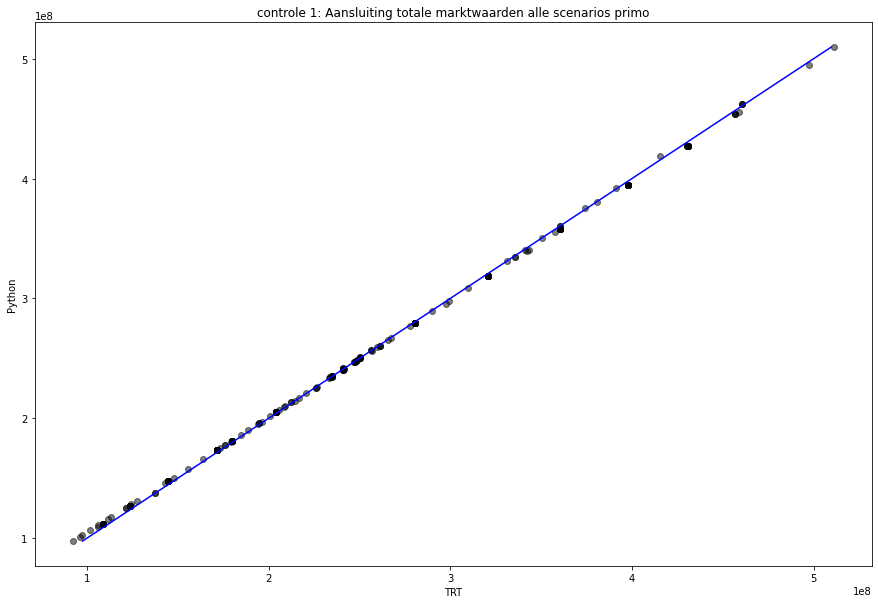

In [51]:
lineStart = df_swaptionsTotal['valuePythonTotal'].min() 
lineEnd = df_swaptionsTotal['valuePythonTotal'].max()
plt.figure(figsize=(15,10))
plt.plot([lineStart, lineEnd], [lineStart, lineEnd], color = 'b')
plt.scatter(df_swaptionsTotal['valueTRTTotal'], df_swaptionsTotal['valuePythonTotal'], color = 'k', alpha=0.5)
plt.title('controle 1: Aansluiting totale marktwaarden alle scenarios primo')
plt.xlabel('TRT')
plt.ylabel('Python')
plt.show

### Verificatie IMW

#### Marktwaarden Python vs IMW basiscurve primo

<function matplotlib.pyplot.show(close=None, block=None)>

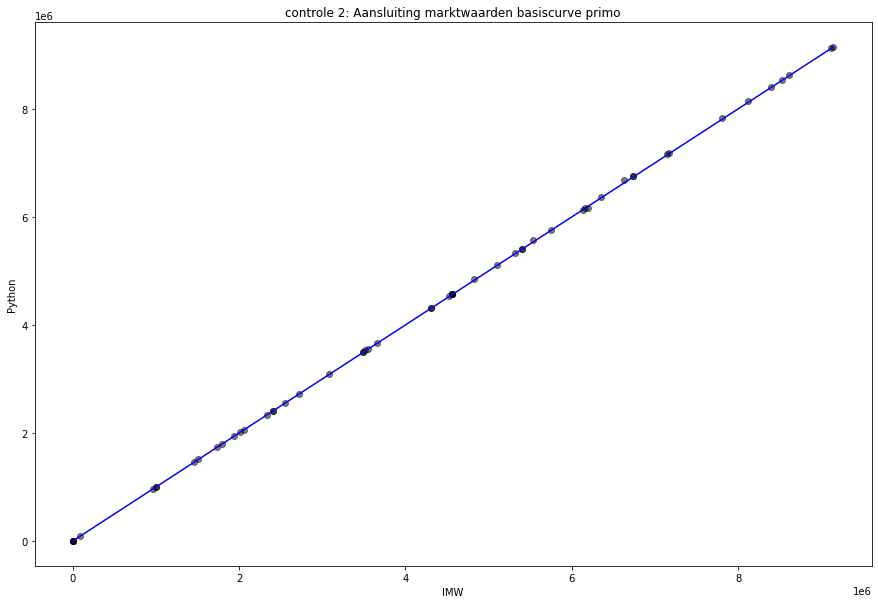

In [52]:
lineStart = df_swaptionsAoC['marketValueModelPrimo'].min() 
lineEnd = df_swaptionsAoC['marketValueModelPrimo'].max()
plt.figure(figsize=(15,10))
plt.plot([lineStart, lineEnd], [lineStart, lineEnd], color = 'b')
plt.scatter(df_swaptionsAoC['marketValueIMWPrimo'], df_swaptionsAoC['marketValueModelPrimo'], color = 'k', alpha=0.5)
plt.title('controle 2: Aansluiting marktwaarden basiscurve primo')
plt.xlabel('IMW')
plt.ylabel('Python')
plt.show

#### Marktwaarden Python vs IMW basiscurve ultimo

<function matplotlib.pyplot.show(close=None, block=None)>

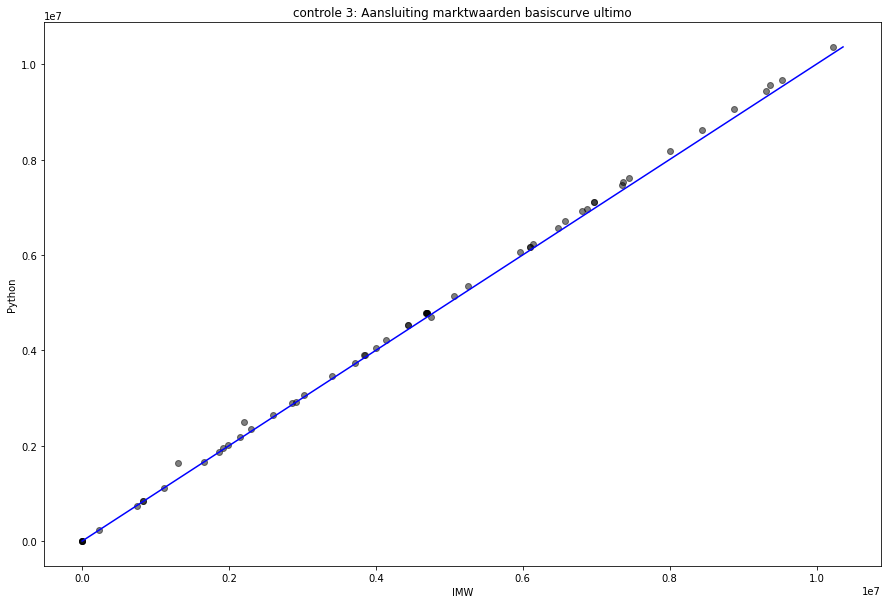

In [53]:
lineStart = df_swaptionsAoC['marketValueModelUltimo'].min() 
lineEnd = df_swaptionsAoC['marketValueModelUltimo'].max()
plt.figure(figsize=(15,10))
plt.plot([lineStart, lineEnd], [lineStart, lineEnd], color = 'b')
plt.scatter(df_swaptionsAoC['marketValueIMWUltimo'], df_swaptionsAoC['marketValueModelUltimo'], color = 'k', alpha=0.5)
plt.title('controle 3: Aansluiting marktwaarden basiscurve ultimo')
plt.xlabel('IMW')
plt.ylabel('Python')
plt.show